# Exploratory Data Analysis on covid-19 cases
## 1. Dataset
The [data](https://github.com/datasets/covid-19) is updated daily, sourced by an upstream repository managed by a team at Johns Hopkins University. It has been cleaned and normalised. 

In [18]:
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 
#if you're working in a Jupyter notebook

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [19]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

The table display the numerical variables, in time series

In [20]:
covid.head()

,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,2,0,2,0
2020-01-25,0,1487,3,0,2,0
2020-01-26,1,2180,3,0,5,0


In [2]:
# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

In [6]:
percapita.head()

,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0.000000,0.041237,0.000000,0.0,0.000303,0.0
2020-01-23,0.000000,0.048052,0.000000,0.0,0.000303,0.0
2020-01-24,0.000000,0.068288,0.003066,0.0,0.000605,0.0
2020-01-25,0.000000,0.103406,0.004598,0.0,0.000605,0.0
2020-01-26,0.002655,0.151597,0.004598,0.0,0.001513,0.0


### Deciding which analysis or explorations are expected to be performed, based on the datasets (and prediction target) at hand

What are the possible use cases?
- [ for this analysis ] Determining delays in pattern i.e. covid-19 WILL show similar pattern just at different timeframes for the different countries. 
- Train a time series prediction model
- Group different countries based on their 'covid stage' (clustering)

#### What kind of analysis to be done?
- __Descriptive analysis (univariate)__
    - provides an understanding of the characteristics of each attribute of the dataset
    - Common
        - attribute's data type
        - percentage of missing values
    - Numerical
        - Quantile stats
        - Descriptive statistics
        - Distribution histogram
- __Correlation analysis (bivariate)__
    - examines the relationship between two attributes
    - Qualitative
        - Compute descriptive stats of dependent numerical attributes
    - Quantitative
        - Using hypothesis-testing framework
        - Formal and mathematical methodology
- __Qualitative analysis__
    - Exploratory analysis to gain an understanding of underlying reasons, opinions, motivations.
    - Provides insights into the problem and helps to develop ideas or hypotheses for potential quantitative research
    - for numerical pair, scatter plot can be used
- __Quantitative analysis__
    - Quantifies relationships by generating numerical data/ data that can be transformed into usable statistics
    - e.g. through statistical hypothesis test: correlation, linear regression
- __Contextual analysis__
    - Time based
        - Descriptive statistics per time interval
    - Agent based
        - In this case the agents are countries

### Performing the selected analysis

## 2. Descriptive analysis
### 2.1 Data type and missing value

In [24]:
percapita.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2020-01-22 to 2020-04-21
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Canada          91 non-null     float64
 1   China           91 non-null     float64
 2   France          91 non-null     float64
 3   Germany         91 non-null     float64
 4   US              91 non-null     float64
 5   United Kingdom  91 non-null     float64
dtypes: float64(6)
memory usage: 5.0 KB


Comments:
- no missing value for this dataset
    - check if there are other strings indicating missing value e.g. ' ' , 'NA', etc
    - there is no such case here
    

### 2.2 Numerical attributes

In [41]:
mad = pd.DataFrame(percapita.mad()).rename(columns={0:'mad'}).T
kurtosis = pd.DataFrame(percapita.kurtosis()).rename(columns={0:'kurtosis'}).T
skew = pd.DataFrame(percapita.skew()).rename(columns={0:'skew'}).T

In [43]:
percapita.describe().append([mad,kurtosis,skew])

,Canada,China,France,Germany,US,United Kingdom
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,20.746959,7.770768,60.112087,58.147079,44.131026,33.201882
std,38.320245,4.035249,99.920194,92.748105,79.516550,60.358440
min,0.000000,0.041237,0.000000,0.000000,0.000303,0.000000
25%,0.021240,4.983807,0.019926,0.020305,0.004840,0.014749
50%,0.164611,9.692515,1.505214,0.975855,0.128877,0.334795
75%,19.586074,11.211088,81.782029,91.296147,47.874018,33.329799
max,144.690558,11.563620,337.132732,296.846105,285.535738,218.557700
mad,28.753354,3.484820,78.283152,75.358636,60.929612,45.555076
kurtosis,2.415514,-0.878547,1.326355,0.533357,1.800044,2.073286


Comments:
- China's max per day is the smallest, but that might be due to the sheer size of China

These histograms display the numerical attributes

## 3. Correlation analysis
### Numerical versus numerical

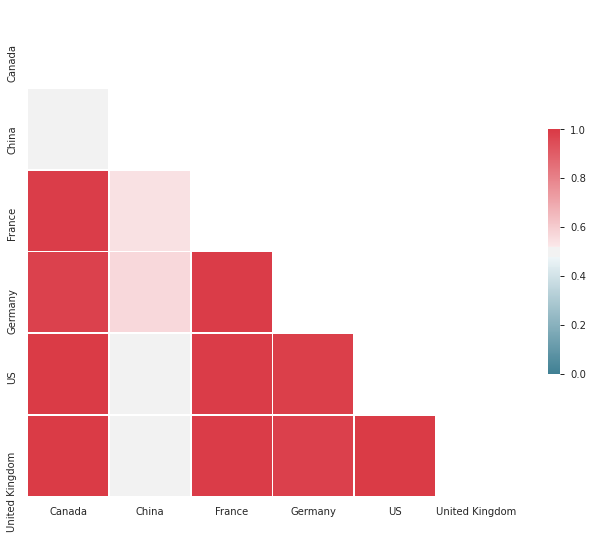

In [51]:
import seaborn as sns
import numpy as np
# Compute the correlation matrix
corr = percapita.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Comment
- Strong correlation between all countries except china,
- indicating that perhaps the different countries are at a similar stage

Using pandas profiling

In [9]:
# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [13]:
# Generate the Profiling Report
profile = ProfileReport(percapita, title="Covid-19 Cases", html={'style': {'full_width': True}}, sort="None")

In [14]:
# The Notebook Widgets Interface
profile.to_widgets()

## Styling

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

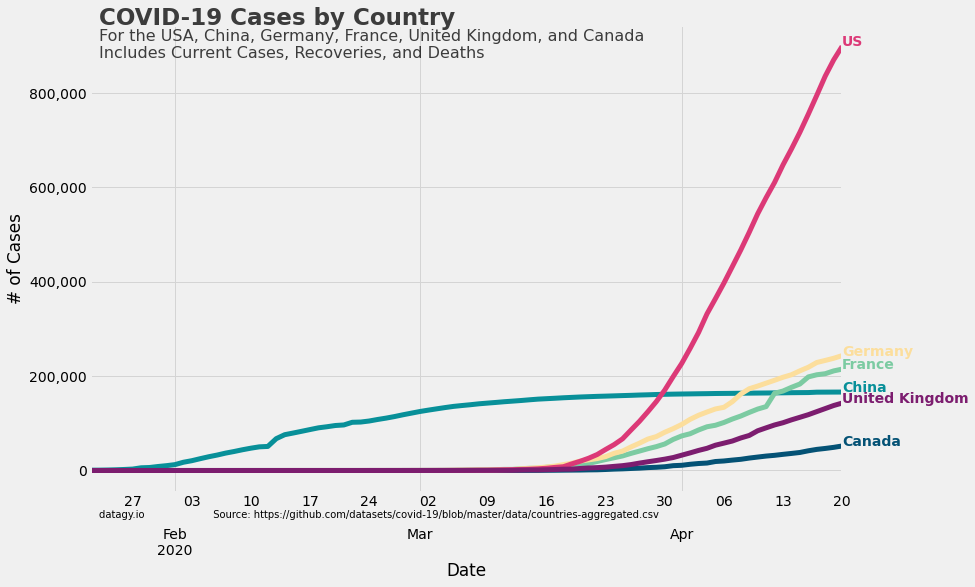

In [20]:
# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())-25000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

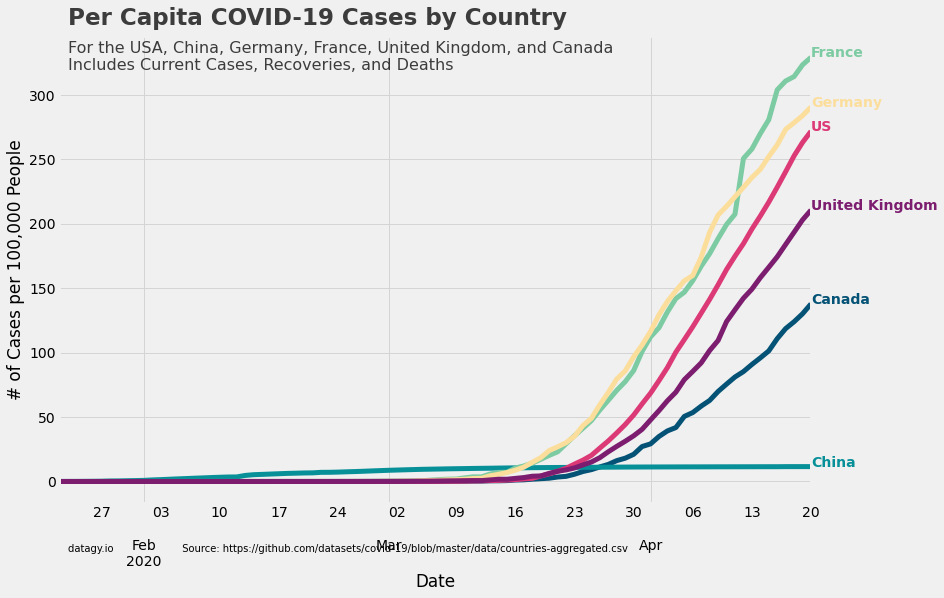

In [16]:

percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()-10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

# Reference
- https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda
- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
- https://shiring.github.io/forecasting/2017/05/28/retail_forcasting_part1
- https://towardsdatascience.com/end-to-end-time-series-analysis-and-modelling-8c34f09a3014
- https://medium.com/analytics-vidhya/predicting-sales-time-series-analysis-forecasting-with-python-b81d3e8ff03f

- https://towardsdatascience.com/visualizing-covid-19-data-beautifully-in-python-in-5-minutes-or-less-affc361b2c6a
- https://github.com/ploner/coronavirus-py
- http://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf?authuser=0
